# BOMR 2021

### Dependency installation

In [1]:
!pip install --quiet opencv-python tqdm matplotlib numpy ipywidgets imutils
!jupyter nbextension enable --py widgetsnbextension
!pip install --quiet --upgrade tdmclient

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


### Imports


In [1]:
import sys as _sys
import cv2
import matplotlib.pyplot as plt
import numpy as np
from time import sleep
import ipywidgets as widgets
_sys.path.append("./src")

from global_navigation import Path_planner
from vision import Vision
from IPython.display import clear_output
from visualizer import get_visualization
from movement import move
from Kalman_filter import Kalman_filter
import tdmclient.notebook
from time import sleep

%matplotlib inline

vision = Vision()
path_planner = Path_planner()



In [2]:
def pltshow(img):
    clear_output(wait = True)
    plt.imshow(img)
    plt.show()
#     plt.imshow(np.zeros((400,600)))
#     plt.show()

#     clear_output(wait = True)

In [3]:
from tdmclient import ClientAsync, aw
client = ClientAsync()
node = await client.wait_for_node()
await node.lock()
await node.wait_for_variables()


In [4]:
leds = {
    "leds.prox.h": [0,0,0,0,0,0,0,0]
}
aw(node.set_variables(leds))

{'error_code': 4}

In [5]:
def set_speed(speed_left, speed_right):
    v = {
        "motor.left.target": [speed_left],
        "motor.right.target": [speed_right],
    }
    aw(node.set_variables(v))

def get_speed():
    right_speed = node['motor.right.speed']
    left_speed = node['motor.left.speed']
    return [left_speed, right_speed]
set_speed(-0,-0)

## Connect to camera and calibrate exposure

In [26]:
vision.connect_camera(0)

## Calibration



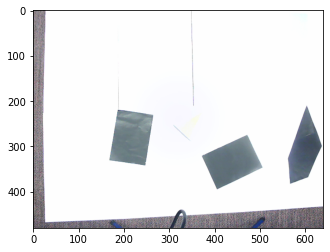

In [32]:
vision.cv.set

for i in range(10):
    sleep(0.1)
    vision.update_frame()
vision.update_frame()
im = plt.imshow(vision.actual_frame)

#### set colors of elements

In [14]:
robot_color = np.array([147, 46, 49])
goal_color = np.array([69, 115, 66])
obstacles_color = np.array([25, 26, 24])

vision.set_colors(obstacles_color, robot_color, goal_color)

In [15]:
goalthresh = 20
robotthresh = 20
obstaclesthresh = 40
vision.set_tresh(goalthresh, robotthresh, obstaclesthresh)

### Test vision

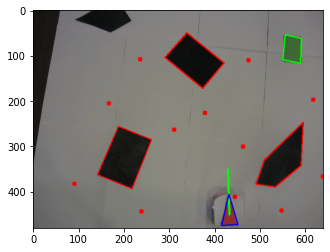

In [16]:
vision.update()
pltshow(vision.create_full_mask())

## set mm to px

In [17]:
vision.set_mm2px()

mm/px ratio :  0.615919863198775



### Plan path

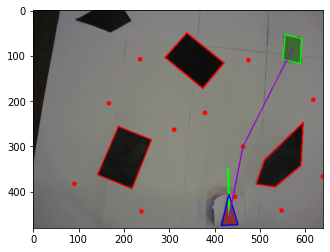

In [18]:
path_planner.make_path(vision)
pltshow(get_visualization(vision, path_planner))

In [24]:
 path_planner.path[1]
    

array([464, 300], dtype=int32)

## Run

## lessgo

In [22]:
set_speed(0,0)

In [24]:
from IPython.display import clear_output
vision.update_frame()
vision.update_robot()
kalman = Kalman_filter(vision)

plt.figure()
vision.update_robot()
pltshow(get_visualization(vision, path_planner))
next_point_id = 1
next_point = path_planner.path[next_point_id]
# send next_point
# init kalmann
min_dist = 30

while 1:
    vision.update_frame()
    vision.update_robot()
    pltshow(get_visualization(vision, path_planner))
    robot_speed = get_speed()

    if vision.robot_detected():
        kalman.update_kalman(vision, robot_speed)
        pos = [kalman.pos_x, kalman.pos_x, vision.robot.orientation]
        speed_robot,dpos = move(pos, next_point, kalman, 0.3, 100,140,-50, -50)
        set_speed(speed_robot[0], int(speed_robot[1]))
        print(speed_robot, dpos, next_point_id)
        # CHECKPOINT 
        
        
        if np.linalg.norm(vision.robot.center - next_point) < min_dist:
            if next_point_id == len(path_planner.path) - 1:
                print("arrived at destination")
                set_speed(0,0)
                break
            else:
                print("arrived at checkpoint")
                next_point_id += 1
                next_point = path_planner.path[next_point_id]
                

IndexError: index 0 is out of bounds for axis 0 with size 0

In [25]:
 vision.disconnect_camera()

In [ ]:
import tdmclient.notebook
await tdmclient.notebook.start()

In [ ]:
motor_left_target = kalaman_speed_left
motor_right_target = kalman_speed_right

%%run_python

local_avoid_tresh = 4000

@onevent
def prox():
    global global_mode
    
    x = [0,0,0,0,0] #we only look a the front sensors
    
    for i in range(len(x)):
    # Get and scale inputs
        x[i] = prox_horizontal[i]
        if x[i] >= local_avoid_tresh:
            global_mode = LOCAL_AVOIDANCE


In [ ]:
## local navigation

In [ ]:
%%run_python #%%transpile_to_aseba # Change to show the code generated in Aseba

#IMPORTANT:
#this programm needs to be launched only when the obsatcle is already detected
#i.e. the sensors already saw something
#otherwise it fucks everything up

# The center button restarts and stops the robot

#sates:
#0 the robot stops 
#1 the robot arrives at the obstacle 
#  and choses which side to go around goes forward until the sensor chose (1 left or 5 right) doesnt see anythin
#2 the robot goes forward approx 1 thymio length
#3 the robot rotates until its sensor (1 or 5) sees the obstacle
#4 the robot follows the obstaclke on its length until its sees nothin
#5 the robot goes forward to completely avoid the obstacle 

adjust2 = 2000
close_thresh = 1
time = 0
state = 1
y = [0,0] 
timer_period[0] = 10
time_one_thym_dist = 150
NONE = 0
side = NONE 
constant_scale = 20
adjust = 5    

@onevent
def timer0():
    global prox_horizontal, motor_left_target, motor_right_target, button_center, state, y, NONE, side, time, global_mode
    #side constants
    LEFT = 1
    RIGHT = 2
    
    #asymetric w_l[1] != w_r[1] so the robot choses one side if it arrives straight on the obstacle
    w_l = [10, -15, -10, 6, 0]
    w_r = [-10, -10, 10, 0, 6]

    # Scale factors for sensors and constant factor
    sensor_scale = 400
    
    x = [0,0,0,0,0]
    
    left_prox = prox_horizontal[0]// sensor_scale
    right_prox = prox_horizontal[4]// sensor_scale
    
### STATE 0 the robot stops###    
    if state == 0:
        time = 0
        y = [0,0]
        
### STATE 1  the robot arrives at the obstacle and choses which side to go around###         
    if state == 1:
        # Memory
        x[3] = y[0]//10
        x[4] = y[1]//10        
        
        for i in range(1,4): #we only take the 3 sensors of the middle
            # Get and scale inputs
            x[i-1] = prox_horizontal[i] // sensor_scale
            
        y = [60,60] 
        tot = x[0]+x[1]+x[2]
        
        for i in range(len(x)):    
            # Compute outputs of neurons and set motor powers
            y[0] = y[0] + x[i] * w_l[i]
            y[1] = y[1] + x[i] * w_r[i]
        
        if tot < close_thresh :#the three middle sensors see nothing
            if left_prox > close_thresh:
                side = LEFT
            if right_prox > close_thresh:
                side = RIGHT
            if left_prox < close_thresh and right_prox < close_thresh: #the thymio turned and stops only if it sees nothin anymore
                state = 2
    
### STATE 2 and 5 : the robot goes forward approx 1 thymio length ###                   
    if state == 2 or state == 5:
        time += 1         
        if time <= time_one_thym_dist:
            y = [160,160]
        elif time > time_one_thym_dist:
            y = [0,0]
            if state == 2:
                time = 0
                state = 3
            if state == 5:
                time = 0
                state = 0
                global_state = GLOBAL_NAVIG
            
### STATE 3 the robot rotates until its sensor (1 or 5) sees the obstacle###   
    if state == 3: 
        if side == RIGHT:
            if right_prox <= close_thresh + adjust:
                y = [160,0]
            if right_prox > close_thresh + adjust:
                state = 4
        if side == LEFT:
            if left_prox <= close_thresh + adjust:
                y = [0,160]
            if left_prox > close_thresh + adjust:
                state = 4
                
### STATE 4 the robot follows the obstacle on its length until its sees nothing###             
    if state == 4:
        left_prox_adjust = left_prox -adjust2//sensor_scale
        right_prox_adjust = right_prox -adjust2//sensor_scale
        if side == RIGHT:
            y = [80,80+right_prox_adjust*constant_scale]
        if side == LEFT:
            y = [80+left_prox_adjust*constant_scale,80]
        if left_prox < close_thresh and right_prox < close_thresh:
            state = 5
        
    # Set motor powers
    motor_left_target = y[0]
    motor_right_target = y[1]           